In [1]:
import cv2
import os
from matplotlib import pyplot as plt

import albumentations as A

In [2]:
root_dir = "/scratch/saksham/data/road_segmentation_ideal/"

train_file = os.path.join(root_dir, "train.csv")

In [3]:
def generate_list_of_images(file_path):
    
    imgs, labels = [], []
    with open(file_path) as f:
        lines = f.readlines()
        
        for line in lines:
            line = line.split()
            imgs.append(line[0].split(",")[0])
            labels.append(line[1].split(",")[0])
            
    return imgs, labels

In [4]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 2, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [5]:
imgs, labels = generate_list_of_images(train_file)

### Original Images

(1500, 1500, 3) (1500, 1500)


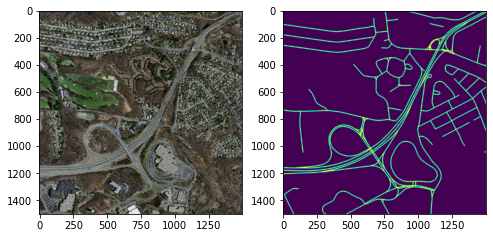

In [40]:
# randomly select 10 images
import random

pairs = list(zip(imgs, labels))
pair = random.choice(pairs)

img = cv2.imread(pair[0])
img = cv2.cvtColor(img, cv2. COLOR_BGR2RGB)
mask = cv2.imread(pair[1], -1)

print(img.shape, mask.shape)
visualize(img, mask)

### Random Crop

(512, 512, 3) (512, 512)


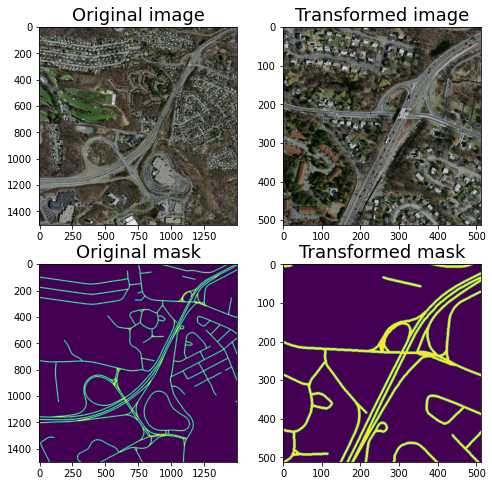

In [41]:
aug = A.RandomCrop(height=512, width=512, p=1)

augmented = aug(image=img, mask=mask)

image_augmented = augmented['image']
mask_augmented = augmented['mask']

print(image_augmented.shape, mask_augmented.shape)

visualize(image_augmented, mask_augmented, original_image=img, original_mask=mask)

### Horizontal Flip

(1500, 1500, 3) (1500, 1500)


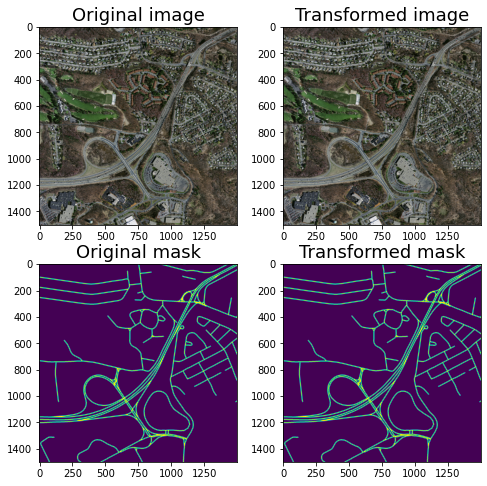

In [42]:
aug = A.HorizontalFlip(p=0.5)

augmented = aug(image=img, mask=mask)

image_augmented = augmented['image']
mask_augmented = augmented['mask']

print(image_augmented.shape, mask_augmented.shape)

visualize(image_augmented, mask_augmented, original_image=img, original_mask=mask)

### Shift Scale Rotate

(1500, 1500, 3) (1500, 1500)


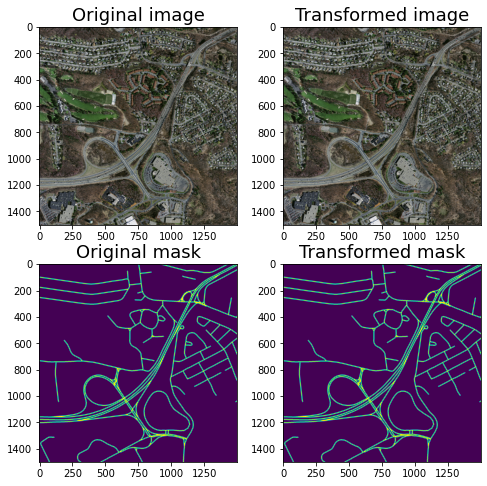

In [43]:
aug = A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25)

augmented = aug(image=img, mask=mask)

image_augmented = augmented['image']
mask_augmented = augmented['mask']

print(image_augmented.shape, mask_augmented.shape)

visualize(image_augmented, mask_augmented, original_image=img, original_mask=mask)

In [44]:
def augmentations(image_size = 512):
    return A.Compose([
        A.RandomCrop(width = image_size, height = image_size, p=1),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.Transpose(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25),
        A.RandomBrightnessContrast(p=0.5),
        A.RandomGamma(p=0.25),
        A.Blur(p=0.01, blur_limit = 3),
        A.OneOf([
            A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
            A.GridDistortion(p=0.5),
            A.OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)                  
        ], p=0.05)
    ], p = 1)

(512, 512, 3) (512, 512)


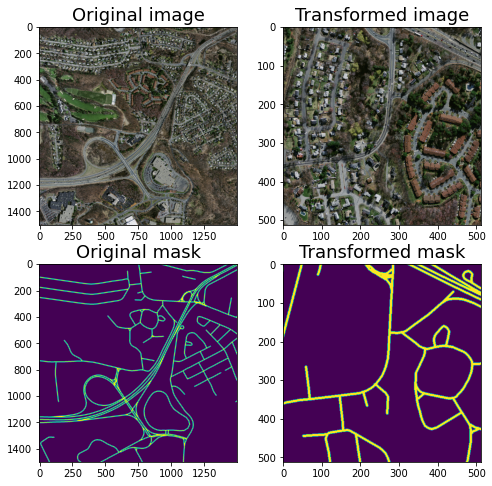

In [45]:
aug = augmentations(image_size = 512)

augmented = aug(image=img, mask=mask)

image_augmented = augmented['image']
mask_augmented = augmented['mask']

print(image_augmented.shape, mask_augmented.shape)

visualize(image_augmented, mask_augmented, original_image=img, original_mask=mask)